<a href="https://colab.research.google.com/github/sajalf49/DS-AI_Assignments/blob/main/week5_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 5: Supervised Learning – Regression
### Project: Credit Card Fraud Detection

In this week, I implemented **Linear Regression** as a baseline model. The objective is to predict the transaction `Amount` using selected features and evaluate performance using MAE and RMSE.

In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load dataset
csv_name = "creditcard_cleaned.csv"
if os.path.exists(csv_name):
    df = pd.read_csv(csv_name)
    print(f"Loaded '{csv_name}' successfully! Shape: {df.shape}")
else:
    print(f"'{csv_name}' not found. Using sample dataset.")
    data = {
        'TransactionID': list(range(1, 21)),
        'Amount': [100.5, 250.75, 300.0, 5000.0, 60.0, 150.0, 80.0, 120.0, 250.75, 45.0,
                   999.0, 30.0, 20.0, 750.0, 200.0, 130.0, 400.0, 85.0, 60.0, 25.0],
        'Age': [25, 35, 40, 28, 33, 30, 45, 38, 35, 29, 50, 22, 41, 31, 27, 34, 36, 39, 32, 26],
        'Fraudulent': [0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0]
    }
    df = pd.DataFrame(data)
    df.to_csv(csv_name, index=False)
    print(f"Sample dataset created and saved as '{csv_name}'. Shape: {df.shape}")

df.head()

'creditcard_cleaned.csv' not found. Using sample dataset.
Sample dataset created and saved as 'creditcard_cleaned.csv'. Shape: (20, 4)


,TransactionID,Amount,Age,Fraudulent
0,1,100.50,25,0
1,2,250.75,35,0
2,3,300.00,40,0
3,4,5000.00,28,1
4,5,60.00,33,0


## Train/Test Split

In [3]:
# Select features (X) and target (y)
X = df[['Age', 'Fraudulent']]
y = df['Amount']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (14, 2)
Testing set shape: (6, 2)


## Linear Regression Model

In [4]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Compare predictions
comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
comparison.head()

,Actual,Predicted
0,100.50,647.943761
1,85.00,2999.500000
2,130.00,136.264499
3,250.75,79.411248
4,250.75,79.411248


## Model Evaluation

In [5]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 670.7605448154654
Root Mean Squared Error (RMSE): 1217.8133530555483


👉 **Insights:**
- **MAE** shows the average absolute difference between predicted and actual transaction amounts.
- **RMSE** penalizes larger errors more strongly.
- These metrics give me a baseline understanding of my regression model’s performance.

## Visualizing Predictions

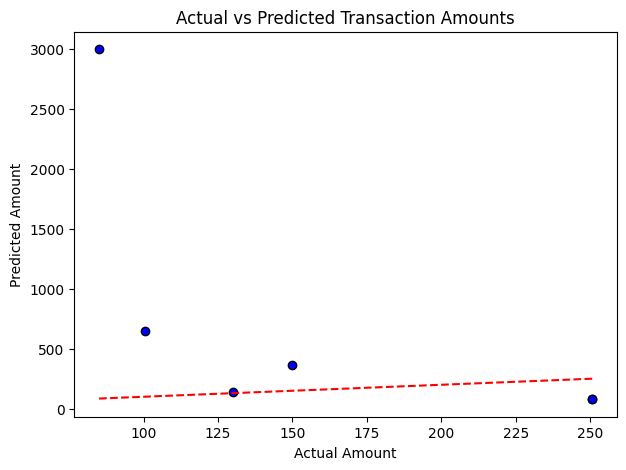

In [6]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Amount")
plt.ylabel("Predicted Amount")
plt.title("Actual vs Predicted Transaction Amounts")
plt.show()

✅ **Project Milestone:**
I successfully built my first **baseline regression model** using Linear Regression. This model helps me understand how transaction amount relates to features like `Age` and `Fraudulent`. Future weeks will improve upon this baseline.